In [177]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import random
import statistics
import math
import seaborn as sns

In [178]:
n = 25

#### а)

In [179]:
px = np.random.sample(n)
x = -np.log(px)

In [180]:
x = np.sort(x)
x = x.round(8)
x

array([0.01343565, 0.03018645, 0.06785197, 0.15814521, 0.16467086,
       0.28318079, 0.30635649, 0.30969012, 0.34363306, 0.42043662,
       0.44053051, 0.49344904, 0.58927568, 0.62463351, 0.72338886,
       0.74579937, 0.76585402, 1.28132629, 1.34258379, 1.3695899 ,
       1.74203511, 2.01287289, 2.13551079, 3.25394675, 3.51179991])

### Мода

In [181]:
statistics.mode(x)

0.01343565

### Медиана

In [182]:
statistics.median(x)

0.58927568

### Размах

In [183]:
x[n-1] - x[0]

3.4983642600000002

In [184]:
x 

array([0.01343565, 0.03018645, 0.06785197, 0.15814521, 0.16467086,
       0.28318079, 0.30635649, 0.30969012, 0.34363306, 0.42043662,
       0.44053051, 0.49344904, 0.58927568, 0.62463351, 0.72338886,
       0.74579937, 0.76585402, 1.28132629, 1.34258379, 1.3695899 ,
       1.74203511, 2.01287289, 2.13551079, 3.25394675, 3.51179991])

### Коэффициент асимметрии

In [185]:
sps.skew(x, axis=0, bias=False)

1.5227691112603496

#### б)

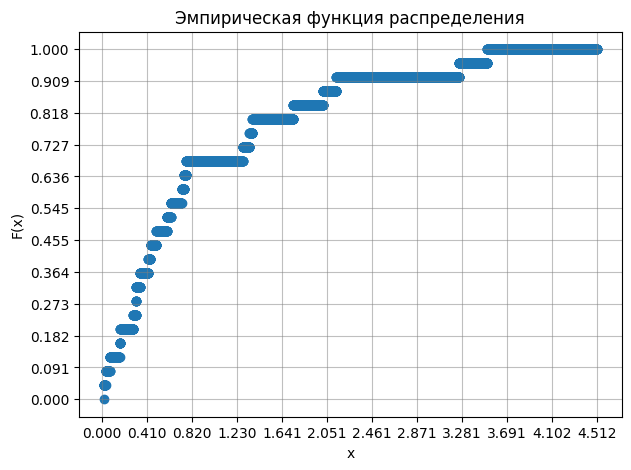

In [186]:
x_line = np.linspace(x[0], x[n-1]+1, 10000)
y = np.array([np.sum(x<i) for i in x_line])/len(x)
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x_line, y)
ax.set_xticks(np.linspace(0, x_line.max(), 12))
ax.set_yticks(np.linspace(0, y.max(), 12))
ax.set_title('Эмпирическая функция распределения')
ax.set_ylabel('F(x)')
ax.set_xlabel('x')
ax.grid(which='major', alpha = 0.5, color = 'grey') 
plt.show()

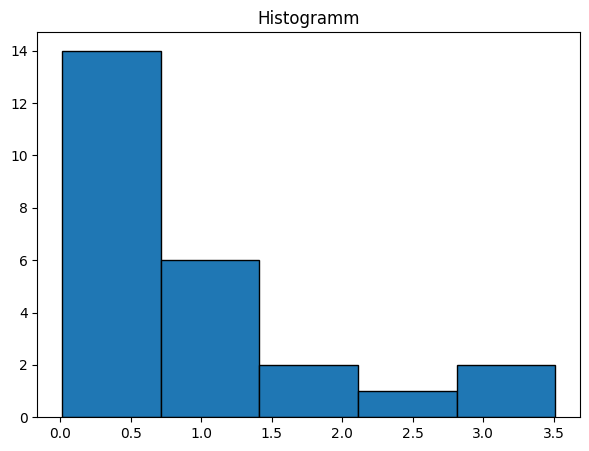

In [187]:
k = 1 + math.log2(n)
fig, ax = plt.subplots(figsize=(7, 5))
plt.hist(x, bins = int(k), edgecolor='black')
ax.set_title('Histogramm')
plt.show()

Text(0.5, 0, 'values')

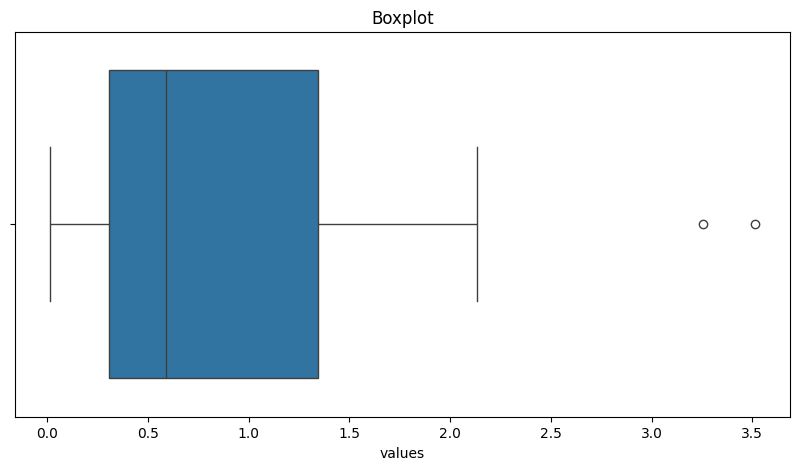

In [188]:
fig, ax = plt.subplots(figsize = (10,5))
bp = sns.boxplot(x, orient='h')
ax.set_title('Boxplot')
bp.set_xlabel('values')

### c) (см. фото)

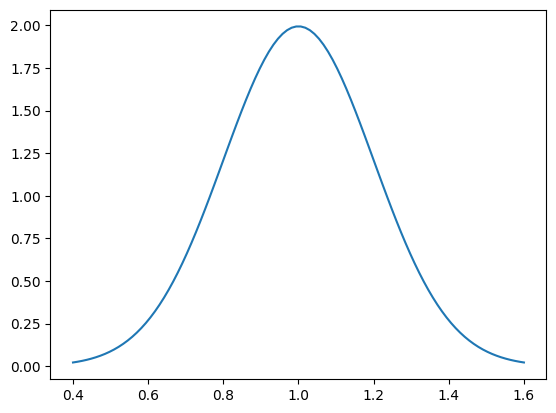

In [189]:
mu = 1
D = 0.04
sigma = math.sqrt(D)
x_th = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x_th, sps.norm.pdf(x_th, mu, sigma))
plt.show()

### Бутстраповская оценка плотности распределения среднего арифметического

In [190]:
boot_means = []
for i in range(1000):
    bootsample = np.random.choice(x, size=n, replace=True)
    boot_means.append(bootsample.mean())

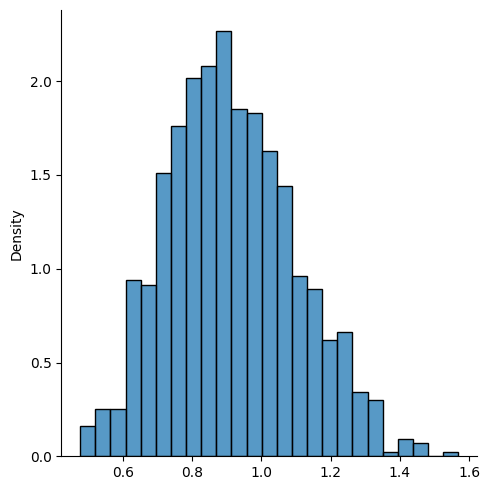

In [191]:
sns.displot(boot_means, bins = n, stat = 'density')

### e) Бутстраповская оценка плотности распределения коэффициента асимметрии

In [192]:
boot_asym = []
for i in range(1000):
    bootsample = np.random.choice(x, size=n, replace=True)
    boot_asym.append(sps.skew(bootsample))

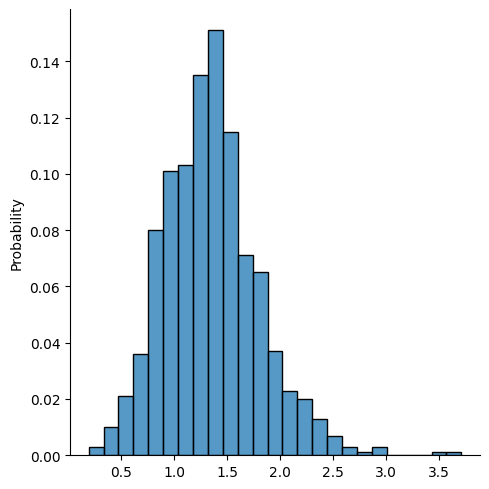

In [193]:
sns.displot(boot_asym, bins = n, stat="probability")

### f) (см. фото)

In [194]:
boot_med = []
for i in range(1000):
    bootsample = np.random.choice(x, size=n, replace=True)
    boot_med.append(statistics.median(bootsample))

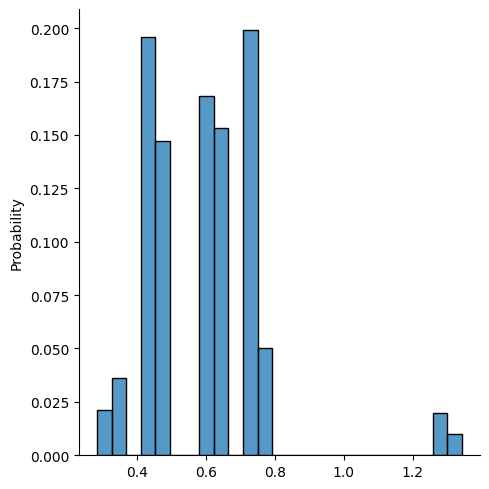

In [195]:
sns.displot(boot_med, bins = n, stat="probability")

In [196]:
def fu(x):
    return 25*np.exp(-x)*math.comb(24, 12)*(-np.exp(-x))**12*(1+np.exp(-x))**12

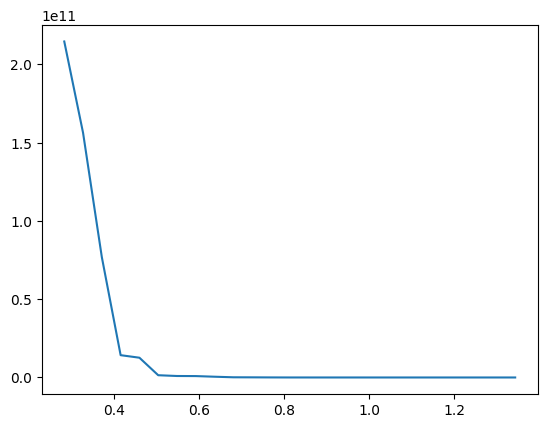

In [197]:
y=fu(x)
x_line = np.linspace(min(boot_med), max(boot_med), 25)
plt.plot(x_line, y)
plt.show()
